## Heart disease prediction using machine learning
This notebook contains a Python based machine learning model that tells whether or not a person has heart disease or not

The following steps will be followed in this project:
   1. Problem definition
   2. Data Collection and pre processing
   3. Evaluation 
   4. Features
   5. Modelling
   6. Experimentation
   7. Improvement

## 1. Problem Definition
Given a heart disease data set, can we predict wheter a person has heart disease or not.

## 2. Data
Data is from Kaggle 

## 3. Evaluation
We want to predict heart disease with a 95% accuracy

## 4. Features
Only 14 attributes used:
      1. #3  (age)       
      2. #4  (sex)       
      3. #9  (cp)        
      4. #10 (trestbps)  
      5. #12 (chol)      
      6. #16 (fbs)       
      7. #19 (restecg)   
      8. #32 (thalach)   
      9. #38 (exang)     
      10. #40 (oldpeak)   
      11. #41 (slope)     
      12. #44 (ca)        
      13. #51 (thal)      
      14. #58 (num)       (the predicted attribute)

**Complete attribute documentation:**
  1. age: age in years
  2. sex: sex (1 = male; 0 = female)
  3. cp: chest pain type
        * Value 1: typical angina
        * Value 2: atypical angina
        * Value 3: non-anginal pain
        * Value 4: asymptomatic
   4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
   5. chol: serum cholestoral in mg/dl
   6. fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
   7. restecg: resting electrocardiographic results
        * Value 0: normal
        * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
   8. thalach: maximum heart rate achieved
   9. exang: exercise induced angina (1 = yes; 0 = no)
   10. oldpeak = ST depression induced by exercise relative to rest
   11. slope: the slope of the peak exercise ST segment
        * Value 1: upsloping
        * Value 2: flat
        * Value 3: downsloping
   12. ca: number of major vessels (0-3) colored by flourosopy
   13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
    14. num: diagnosis of heart disease (angiographic disease status)
        * Value 0: < 50% diameter narrowing
        * Value 1: > 50% diameter narrowing
        (in any major vessel: attributes 59 through 68 are vessels)

## Import the libraries

In [8]:
# Import all the tools we need

# Import EDA and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Shows plots in the notebook
%matplotlib inline 
# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_predict,cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

AttributeError: module 'sklearn.metrics' has no attribute 'plot_roc_curve'

## Load Data

In [5]:
df = pd.read_csv("heart-disease.csv")
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [9]:
df.shape

(303, 14)

## Data Exploration

Get a hang of the data
1. What questions are we trying to solve?
2. Kind of data we are having and how to treat different types?
3. Missing data and how do we resolve it?
4. Outliers and how to control them?
5. Add, change, or remove features

In [10]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [15]:
df.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0

In [17]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

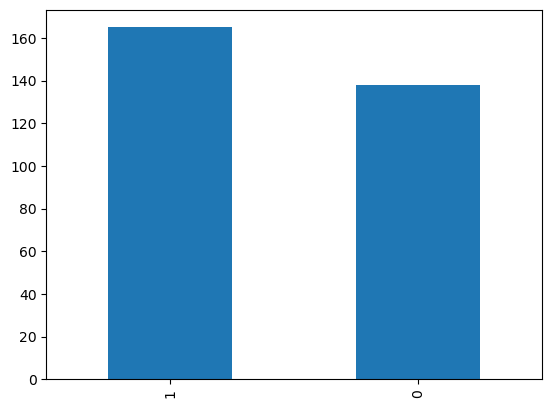

In [20]:
df.target.value_counts().plot(kind = "bar");

In [21]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Heart disease wrt to sex

In [22]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [23]:
pd.crosstab(df.target , df.sex)

sex      0    1
target         
0       24  114
1       72   93

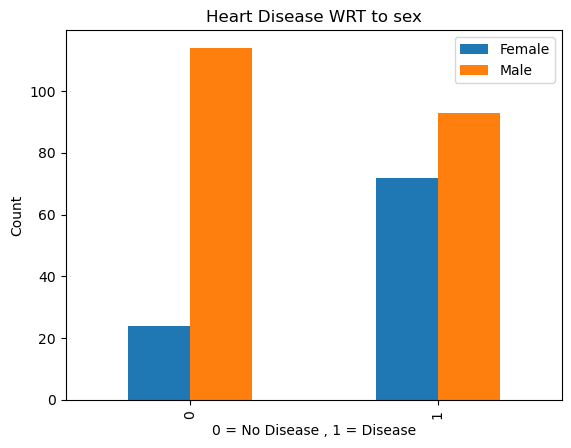

In [27]:
# PLot graph
pd.crosstab(df.target, df.sex).plot(kind = "bar")
plt.title("Heart Disease WRT to sex")
plt.xlabel("0 = No Disease , 1 = Disease")
plt.ylabel("Count")
plt.legend(["Female" , "Male"])

## Age VS max. heart rate

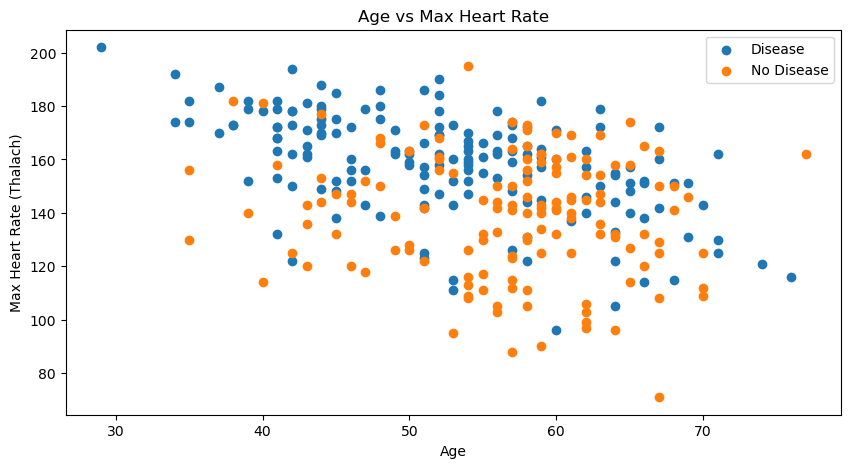

In [37]:
plt.figure(figsize=(10,5))
plt.scatter( df.age[df.target == 1] , df.thalach[df.target == 1]);

plt.scatter(df.age[df.target == 0] , df.thalach[df.target == 0] );


plt.title("Age vs Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate (Thalach)")
plt.legend(['Disease', "No Disease"] )

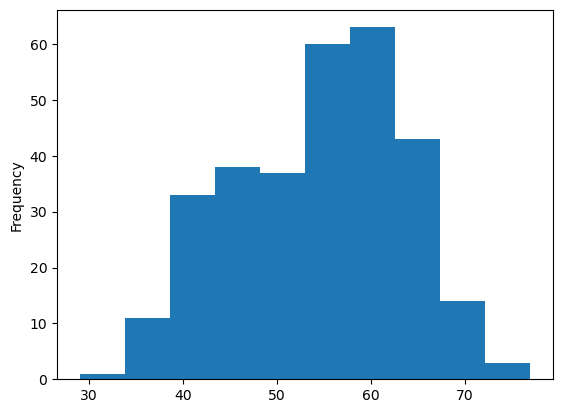

In [39]:
df.age.plot.hist();

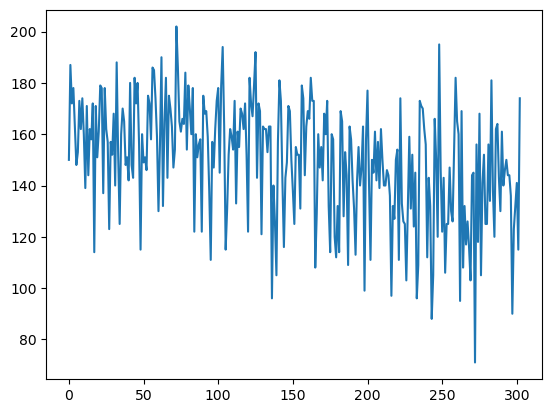

In [43]:
df.thalach.plot.line();

## Heart disease frequency per chest pain
cp: chest pain type
* Value 1: typical angina
* Value 2: atypical angina
* Value 3: non-anginal pain
* Value 4: asymptomatic

In [45]:
pd.crosstab(df.cp , df.target)

target    0   1
cp             
0       104  39
1         9  41
2        18  69
3         7  16

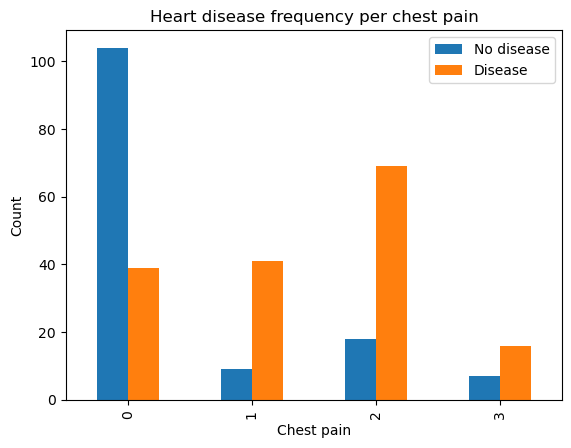

In [54]:
pd.crosstab(df.cp,df.target).plot(kind = "bar");
plt.legend(["No disease" , 'Disease']);
plt.xlabel("Chest pain")
plt.ylabel("Count")
plt.title("Heart disease frequency per chest pain");

In [55]:
# Make a correlation matrix
df.corr()

age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.032019   
target   -0.225439 -0.280937  0.433798 -0.144931 -0.085239 -0.028046   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.116211 -0.398522  0.096801  0.210013 -0.168814  0.276326   
sex      -0.058196 -0.044020  0.141664  0.096093 -0.030711  0.118261   
cp        0.044421  0.295762 -0.394280 -0.149230  0.119717 -0.181053   
trestbps -0.114103 -0.046698  0.067616  0.193216 -0.121475  0.101389   
chol     -0.151040 -0.009940  0.067023  0.053952 -0.004038  0.070511   
fbs      -0.084189 -0.008567  0.025665  0.005747 -0.059894  0.137979   
restecg   1.000000  0.044123 -0.070733 -0.058770  0.093045 -0.072042   
thalach   0.044123  1.000000 -0.378812 -0.344187  0.386784 -0.213177   
exang    -0.070733 -0.378812  1.000000  0.288223 -0.257748  0.115739   
oldpeak  -0.058770 -0.344187  0.288223  1.000000 -0.577537  0.222682   
slope     0.093045  0.386784 -0.257748 -0.577537  1.000000 -0.080155   
ca       -0.072042 -0.213177  0.115739  0.222682 -0.080155  1.000000   
thal     -0.011981 -0.096439  0.206754  0.210244 -0.104764  0.151832   
target    0.137230  0.421741 -0.436757 -0.430696  0.345877 -0.391724   

              thal    target  
age       0.068001 -0.225439  
sex       0.210041 -0.280937  
cp       -0.161736  0.433798  
trestbps  0.062210 -0.144931  
chol      0.098803 -0.085239  
fbs      -0.032019 -0.028046  
restecg  -0.011981  0.137230  
thalach  -0.096439  0.421741  
exang     0.206754 -0.436757  
oldpeak   0.210244 -0.430696  
slope    -0.104764  0.345877  
ca        0.151832 -0.391724  
thal      1.000000 -0.344029  
target   -0.344029  1.000000

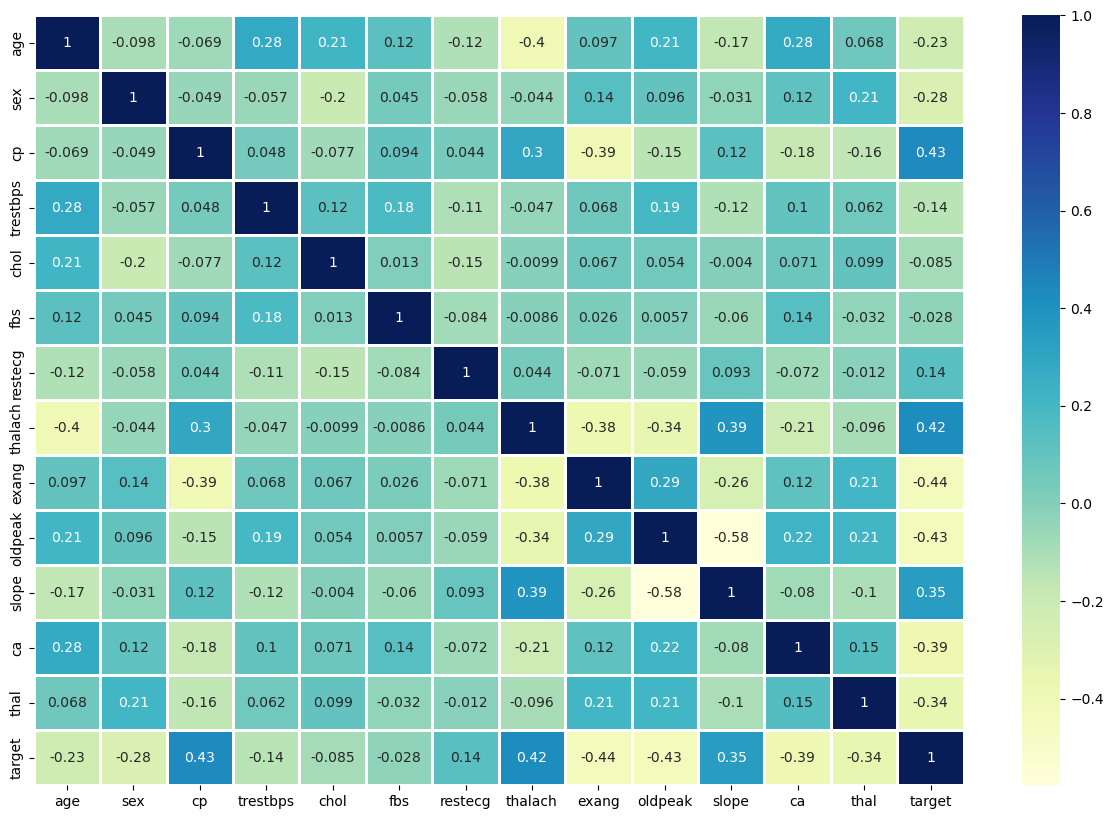

In [60]:
# Visualize correlation matrix
corr_mat = df.corr()
fig , ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_mat , annot = True , cmap = "YlGnBu" , linewidths=1)

## 5. Modelling 

In [61]:
# Split data into X and y
X = df.drop("target" , axis = 1)
y = df['target']


In [63]:
X

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0     2  
3        2   0     2  
4        2   0     2  
..     ...  ..   ...  
298      1   0     3  
299      1   0     3  
300      1   2     3  
301      1   1     3  
302      1   1     2  

[303 rows x 13 columns]

In [64]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [67]:
np.random.seed(42)
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [68]:
x_train

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
132   42    1   1       120   295    0        1      162      0      0.0   
202   58    1   0       150   270    0        0      111      1      0.8   
196   46    1   2       150   231    0        1      147      0      3.6   
75    55    0   1       135   250    0        0      161      0      1.4   
176   60    1   0       117   230    1        1      160      1      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
188   50    1   2       140   233    0        1      163      0      0.6   
71    51    1   2        94   227    0        1      154      1      0.0   
106   69    1   3       160   234    1        0      131      0      0.1   
270   46    1   0       120   249    0        0      144      0      0.8   
102   63    0   1       140   195    0        1      179      0      0.0   

     slope  ca  thal  
132      2   0     2  
202      2   0     3  
196      1   0     2  
75       1   0     2  
176      2   2     3  
..     ...  ..   ...  
188      1   1     3  
71       2   1     3  
106      1   1     2  
270      2   0     3  
102      2   2     2  

[242 rows x 13 columns]

In [69]:
y_train , len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

COnverted data into training and testing data

We'll train the model to find the patterns and improve it

Then we will use the patterns to predict diseases.

We will try 3 different models:
   1. Logistic Regression
   2. KNeighbors
   3. RandomForestClassifier

In [71]:
models = {
    "KNeighbors" : KNeighborsClassifier(),
    "Random Forest Classifier" : RandomForestClassifier(),
    "Logistic Regression" : LogisticRegression()    
}

def fit_and_train(models , x_train , x_test , y_train , y_test):
    np.random.seed(42)
    model_scores = {}
    for name , model in models.items():
        # Fit the model
        model.fit(x_train , y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] =  model.score(x_test , y_test)
    return model_scores

fit_and_train(models , x_train , x_test , y_train , y_test)

F:\Courses\MLandDS\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNeighbors': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918,
 'Logistic Regression': 0.8852459016393442}

F:\Courses\MLandDS\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


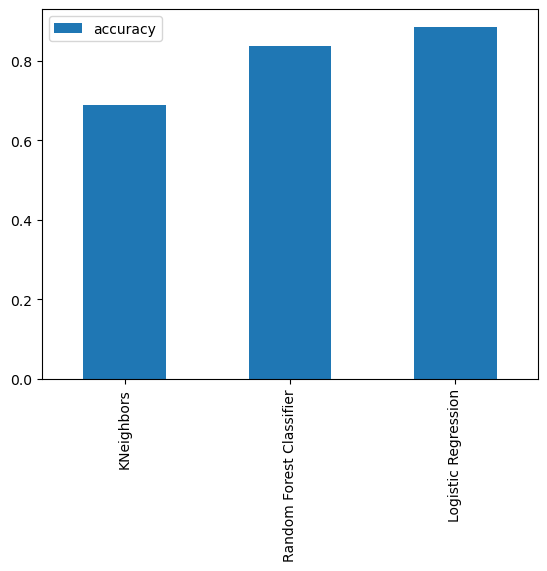

In [74]:
model_scores = fit_and_train(models , x_train , x_test , y_train , y_test)
model_compare = pd.DataFrame(model_scores , index = ["accuracy"])
model_compare.T.plot.bar();

Let's look at the following:
* Hyperparameter tuning
* Feature importance 
* Confusion matrix
* Classification report
* ROC Curve
* Area Under the Curve (AUC)
* F1 Score
* Recall
* Precision
* Cross-Validation
## Hyper parameter tuning (KNN)

In [79]:
# Lets tune KNN

train_scores = []
test_scores = []
# Create different values for neighbors
neighbours = range(1,20)
# Create KNN instance
knn = KNeighborsClassifier()

for i in neighbours:
    # Set the parameters
    knn.set_params(n_neighbors = i)
    # Fit the model
    knn.fit(x_train ,y_train)
    # Update the training scores
    train_scores.append(knn.score(x_train , y_train))
    # Update the testing scores
    test_scores.append(knn.score(x_test , y_test))
train_scores
    

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818]

In [80]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853]

Maximum score accuracy for KNN: 75.41 %


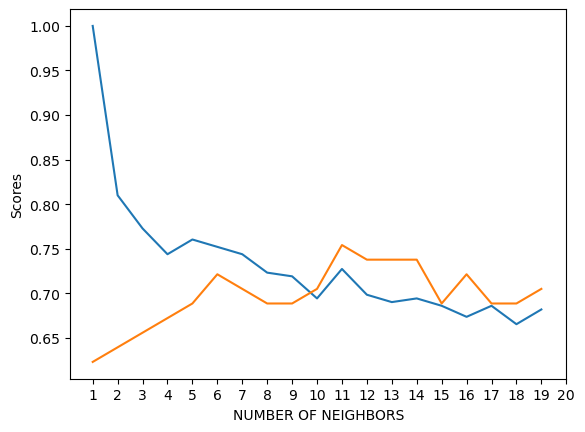

In [87]:
plt.plot(neighbours , train_scores , label="Train Scores")
plt.plot(neighbours , test_scores , label="Test Scores")
plt.xlabel("NUMBER OF NEIGHBORS")
plt.ylabel("Scores")
plt.xticks(np.arange(1,21,1));
print(f"Maximum score accuracy for KNN: {max(test_scores)*100:.2f} %")

## Hyper parameter tuning with RandomizedSearchCV

We are going to tune LogisticRegression and RandomForestClassifier using RandomSearchCV

In [88]:
# Create a hyperparameter grid for LogisticRegression()
lr_grid = {
    "C":np.logspace(-4,4,20),
    "solver":["liblinear"]
}
# Create a hyperparameter grid for RandomForestClassifier()
rfc_grid = {
    "n_estimators":np.arange(10 , 1000 , 50),
    "max_depth": [None, 3, 5],
    "min_samples_split":np.arange(2,20,2),
    "min_samples_leaf":np.arange(1,20,2)
}

Now we have our grids setup now we will use RAndomizedSearchCV() to tune the models

In [89]:
# Tune Logistice Regression

np.random.seed(42)

# Setup hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression() ,param_distributions=lr_grid , cv = 5 , n_iter = 20 , verbose = True)

# Fit random hyperparameters for LogisticRegression

rs_log_reg.fit(x_train , y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [91]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [92]:
rs_log_reg.score(x_test , y_test)

0.8852459016393442

### Now We tune RandomeForestClassifier

In [94]:
rfc = RandomizedSearchCV(RandomForestClassifier() , param_distributions=rfc_grid , cv = 5 , n_iter = 20 , verbose = True)

# Fit the model
rfc.fit(x_train , y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [95]:
# Get best params
rfc.best_params_

{'n_estimators': 110,
 'min_samples_split': 12,
 'min_samples_leaf': 17,
 'max_depth': 3}

In [96]:
# Get best score for RandomForestClassifier
rfc.score(x_test , y_test)

0.8688524590163934

In [97]:
model_scores

{'KNeighbors': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918,
 'Logistic Regression': 0.8852459016393442}

Tune by:
* by hand
* RandomizedSearchCV()
* GridSearchCV()

Since our LogisticRegression model is providing the best score, we will try to improve it using GridSearchCV()

In [99]:
# Different hyperparameters for LogistcRegression()
lr_grid = {
    "C":np.logspace(-4,4,30),
    "solver":['liblinear']
}
# Setup hyperparameter search for LogisticRegresion
gscv = GridSearchCV(LogisticRegression() , param_grid=lr_grid , cv = 5 , verbose = True)
# Fit the model
gscv.fit(x_train , y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [100]:
# Check the best hyper paramters
gscv.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [101]:
#We check the score
gscv.score(x_test , y_test)

0.8852459016393442

In [102]:
model_scores

{'KNeighbors': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918,
 'Logistic Regression': 0.8852459016393442}

### Evalauting pur models beyond accuracy.
* Roc and AUC
* Confusion Matrix
* Classification report
* F1 socre
* Recall
* Precision

In [107]:
# To evaluate our trained model we need to make predictions
y_pred = gscv.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [106]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [115]:
from sklearn.metrics import RocCurveDisplay 

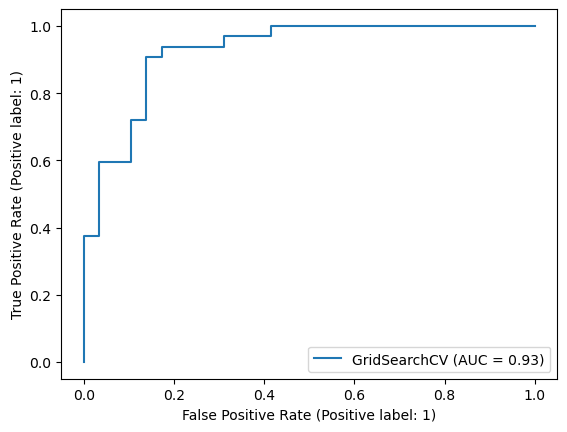

In [113]:
RocCurveDisplay.from_estimator(gscv, x_test, y_test);

In [116]:
confusion_matrix(y_test , y_pred)

array([[25,  4],
       [ 3, 29]], dtype=int64)

In [123]:
def plot_conf_mat(y_test , y_pred):
    fif , ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test , y_pred),annot=True)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")

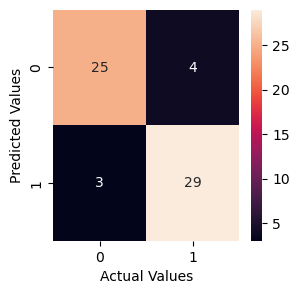

In [122]:
plot_conf_mat(y_test , y_pred)

## Classification Report

In [125]:
# Lets get classification report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Classification report using cross validation

In [128]:
gscv.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [129]:
lrc = LogisticRegression(C=0.20433597178569418 , solver="liblinear")
lrc.fit(x_train , y_train)
cross_val_score(lrc , x_test , y_test , cv = 5)

array([0.76923077, 0.83333333, 0.91666667, 0.83333333, 0.83333333])

In [141]:
# Cross validated accuracy
acc = np.mean(cross_val_score(lrc , X , y , scoring="accuracy"))

In [142]:
# Cross validated precision
pre = np.mean(cross_val_score(lrc , X , y , scoring="precision"))

In [143]:
# Cross validated recall
rec = np.mean(cross_val_score(lrc , X , y , scoring="recall"))

In [144]:
# Cross validated f1
f1 = np.mean(cross_val_score(lrc , X , y , scoring="f1"))

In [148]:
# Visualize the evaluations
evalu = pd.DataFrame({
    "Accuracy":acc,
    "Precision":pre,
    "F1 score": f1,
    "Recall": rec
} , index = [0])
evalu

Accuracy  Precision  F1 score    Recall
0  0.844699   0.820794  0.867301  0.921212

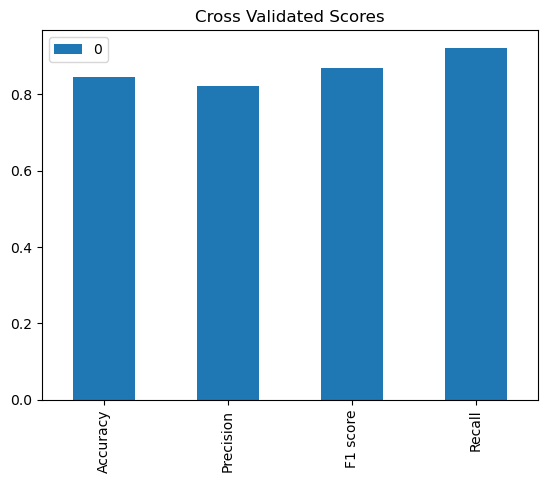

In [151]:
evalu.T.plot.bar(title = "Cross Validated Scores");

## Feature Importance
Which features contribute most to the output?

In [152]:
lrc.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [160]:
features_dict = dict(zip(df.columns, lrc.coef_[0]))
features_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

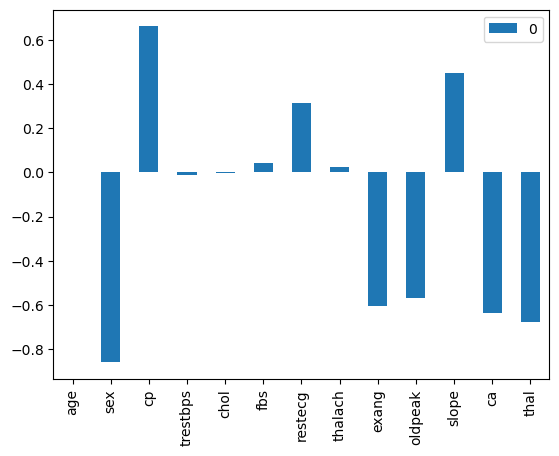

In [165]:
features_df = pd.DataFrame(features_dict , index = [0])
features_df.T.plot.bar();

In [166]:
pd.crosstab(df['sex'] , df['target'])

target    0   1
sex            
0        24  72
1       114  93